# <font color='#eb3483'> Project 2 - NLP </font>

In [2]:
import pandas as pd
import numpy as np
from numpy import array
from numpy import asarray
from numpy import zeros
import os
import csv
from sklearn.decomposition import PCA 

In [3]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import time
import datetime

from datetime import datetime

In [4]:
import nltk as nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.data import LazyLoader
from nltk import punkt

In [5]:
!pip install jupyter_contrib_nbextensions

In [6]:
!jupyter contrib nbextension install

[W 04:05:24 InstallContribNbextensionsApp] Config option `kernel_spec_manager_class` not recognized by `InstallContribNbextensionsApp`.
[I 04:05:24 InstallContribNbextensionsApp] jupyter contrib nbextension install 
[I 04:05:24 InstallContribNbextensionsApp] Installing jupyter_contrib_nbextensions nbextension files to jupyter data directory
[I 04:05:24 InstallContribNbextensionsApp] Installing /opt/anaconda3/lib/python3.9/site-packages/jupyter_contrib_nbextensions/nbextensions/rubberband -> rubberband
[I 04:05:24 InstallContribNbextensionsApp] Up to date: /usr/local/share/jupyter/nbextensions/rubberband/icon.png
[I 04:05:24 InstallContribNbextensionsApp] Up to date: /usr/local/share/jupyter/nbextensions/rubberband/main.css
[I 04:05:24 InstallContribNbextensionsApp] Up to date: /usr/local/share/jupyter/nbextensions/rubberband/readme.md
[I 04:05:24 InstallContribNbextensionsApp] Up to date: /usr/local/share/jupyter/nbextensions/rubberband/main.js
[I 04:05:24 InstallContribNbextensionsApp

[I 04:05:24 InstallContribNbextensionsApp] Up to date: /usr/local/share/jupyter/nbextensions/cell_filter/cell_filter.yml
[I 04:05:24 InstallContribNbextensionsApp] Up to date: /usr/local/share/jupyter/nbextensions/cell_filter/cell_filter.js
[I 04:05:24 InstallContribNbextensionsApp] Up to date: /usr/local/share/jupyter/nbextensions/cell_filter/README.md
[I 04:05:24 InstallContribNbextensionsApp] - Validating: OK
[I 04:05:24 InstallContribNbextensionsApp] Installing /opt/anaconda3/lib/python3.9/site-packages/jupyter_contrib_nbextensions/nbextensions/scratchpad -> scratchpad
[I 04:05:24 InstallContribNbextensionsApp] Up to date: /usr/local/share/jupyter/nbextensions/scratchpad/LICENSE
[I 04:05:24 InstallContribNbextensionsApp] Up to date: /usr/local/share/jupyter/nbextensions/scratchpad/scratchpad.yaml
[I 04:05:24 InstallContribNbextensionsApp] Up to date: /usr/local/share/jupyter/nbextensions/scratchpad/README.md
[I 04:05:24 InstallContribNbextensionsApp] Up to date: /usr/local/share/ju

[I 04:05:24 InstallContribNbextensionsApp] Up to date: /usr/local/share/jupyter/nbextensions/code_prettify/demo-R.gif
[I 04:05:24 InstallContribNbextensionsApp] Up to date: /usr/local/share/jupyter/nbextensions/code_prettify/isort.js
[I 04:05:24 InstallContribNbextensionsApp] Up to date: /usr/local/share/jupyter/nbextensions/code_prettify/code_prettify.yaml
[I 04:05:24 InstallContribNbextensionsApp] Up to date: /usr/local/share/jupyter/nbextensions/code_prettify/2to3.js
[I 04:05:24 InstallContribNbextensionsApp] Up to date: /usr/local/share/jupyter/nbextensions/code_prettify/autopep8.yaml
[I 04:05:24 InstallContribNbextensionsApp] Up to date: /usr/local/share/jupyter/nbextensions/code_prettify/isort.yaml
[I 04:05:24 InstallContribNbextensionsApp] - Validating: OK

[I 04:05:24 InstallContribNbextensionsApp] Up to date: /usr/local/share/jupyter/nbextensions/code_prettify/demo-py.gif
[I 04:05:24 InstallContribNbextensionsApp] Up to date: /usr/local/share/jupyter/nbextensions/code_prettify

In [7]:
os.getcwd()

'/Users/bessyang/Desktop/NYU/Spring 2023/Machine Learning/Projects/project 2'

In [8]:
from nltk.corpus import wordnet
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bessyang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
import gensim
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [10]:
import re
import csv

# <font color='#eb3483'> 1. Import Data </font>

This is a dataset with airbnb reviews. 

In [11]:
df = pd.read_csv('data/df_eng_2020.csv')
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3831,588410318,1/4/20,47646626,Thorsten,We had a nice stay with Lisa in Brooklyn. Espe...
1,3831,589143289,1/5/20,23587571,Rodrigo,The location it’s fantastic. Even it’s an enti...
2,3831,597434314,1/25/20,2308141,Trafton,Lisa Roxanne was a great host and very accomod...
3,3831,598086924,1/26/20,2426722,Tawanna,DO NOT stay here if your expecting anything l...
4,3831,601064768,2/2/20,11655823,Vera,LisaRoxanne's place is conveniently located cl...


In [12]:
df.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [13]:
df.shape

(137295, 6)

In [14]:
df.duplicated().sum()

0

No missing values.

<AxesSubplot:xlabel='comments'>

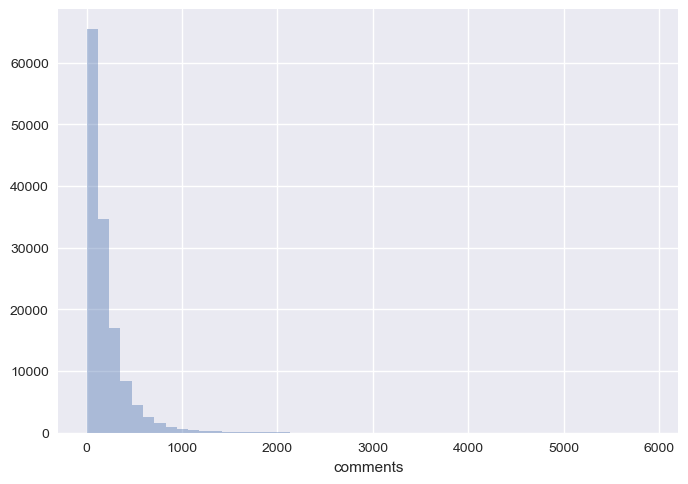

In [15]:
#check the length of reviews

length_reviews = df['comments'].str.len()

sns.distplot(length_reviews,kde=False)

In [16]:
#most common words in reviews

freq = pd.Series(' '.join(df['comments']).split()).value_counts()[:10] #This will give us the 10 most frequent words

print(freq)

and      224498
the      174602
to       134117
a        133583
was      122268
is        94888
I         79079
in        74776
The       59577
place     58926
dtype: int64


Most of them are stopwords.

In [17]:
df_abb = df[['comments']]
df_abb.head()

,comments
0,We had a nice stay with Lisa in Brooklyn. Espe...
1,The location it’s fantastic. Even it’s an enti...
2,Lisa Roxanne was a great host and very accomod...
3,DO NOT stay here if your expecting anything l...
4,LisaRoxanne's place is conveniently located cl...


In [18]:
#turn comments column into a list of text

sent = df_abb.comments.tolist()
sent

['We had a nice stay with Lisa in Brooklyn. Especially here tips were helpful and completely on point. Communication in general was very good.',
 'The location it’s fantastic. Even it’s an entire place for your own doesn’t feel like it because don’t have door with you neighbors. The upside it’s your neighbor is your host who happens to ve very kind. \nCould be a bit more clean.',
 "Lisa Roxanne was a great host and very accomodating. If you're looking for a great place to touchdown in Brooklyn, this is it!",
 'DO NOT  stay here if your expecting anything like the photo or any peace & quiet . This place was a total mess not up to ABNB standards at all. You can definitely find a better room for this price .',
 "LisaRoxanne's place is conveniently located close to many subway stops, and walking distance to attractions such as the BAM, restaurants and parks. \nThe accommodations are comfortable, great king size bed, and clean. LisaRoxanne was responsive and flexible. Thank you!",
 "We love

In [19]:
len(sent)

137295

# <font color='#eb3483'> 2. Clean and prep data  </font>

In [20]:
#to lower case
sent = [item.lower() for item in sent]

In [21]:
len(sent)

137295

In [22]:
sent

['we had a nice stay with lisa in brooklyn. especially here tips were helpful and completely on point. communication in general was very good.',
 'the location it’s fantastic. even it’s an entire place for your own doesn’t feel like it because don’t have door with you neighbors. the upside it’s your neighbor is your host who happens to ve very kind. \ncould be a bit more clean.',
 "lisa roxanne was a great host and very accomodating. if you're looking for a great place to touchdown in brooklyn, this is it!",
 'do not  stay here if your expecting anything like the photo or any peace & quiet . this place was a total mess not up to abnb standards at all. you can definitely find a better room for this price .',
 "lisaroxanne's place is conveniently located close to many subway stops, and walking distance to attractions such as the bam, restaurants and parks. \nthe accommodations are comfortable, great king size bed, and clean. lisaroxanne was responsive and flexible. thank you!",
 "we love

In [23]:
#expand contractions

!pip install contractions

In [24]:
import contractions

In [25]:
sent = [contractions.fix(item) for item in sent]

In [26]:
sent

['we had a nice stay with lisa in brooklyn. especially here tips were helpful and completely on point. communication in general was very good.',
 'the location it is fantastic. even it is an entire place for your own does not feel like it because do not have door with you neighbors. the upside it is your neighbor is your host who happens to ve very kind. \ncould be a bit more clean.',
 'lisa roxanne was a great host and very accomodating. if you are looking for a great place to touchdown in brooklyn, this is it!',
 'do not  stay here if your expecting anything like the photo or any peace & quiet . this place was a total mess not up to abnb standards at all. you can definitely find a better room for this price .',
 "lisaroxanne's place is conveniently located close to many subway stops, and walking distance to attractions such as the bam, restaurants and parks. \nthe accommodations are comfortable, great king size bed, and clean. lisaroxanne was responsive and flexible. thank you!",
 "w

In [27]:
#remove numbers 

sent=[re.sub(r'\d+', '',item) for item in sent]

In [28]:
#remove symbols, characters, puncutations

import string
translator=str.maketrans('','',string.punctuation)
sent = [item.translate(translator) for item in sent]

In [29]:
#remove extra space

sent=[item.strip() for item in sent]

In [30]:
len(sent)

137295

In [31]:
#tokenize & lemmatize words in sentences

sent3 = [[lemmatizer.lemmatize(word) for word in word_tokenize(s)]
              for s in sent]

In [32]:
sent3[0]

['we',
 'had',
 'a',
 'nice',
 'stay',
 'with',
 'lisa',
 'in',
 'brooklyn',
 'especially',
 'here',
 'tip',
 'were',
 'helpful',
 'and',
 'completely',
 'on',
 'point',
 'communication',
 'in',
 'general',
 'wa',
 'very',
 'good']

In [33]:
#put back the sentences

sent4a=[' '.join(row) for row in sent3]

In [34]:
sent4a[0:3]

['we had a nice stay with lisa in brooklyn especially here tip were helpful and completely on point communication in general wa very good',
 'the location it is fantastic even it is an entire place for your own doe not feel like it because do not have door with you neighbor the upside it is your neighbor is your host who happens to ve very kind could be a bit more clean',
 'lisa roxanne wa a great host and very accomodating if you are looking for a great place to touchdown in brooklyn this is it']

In [35]:
#remove stopwords

from nltk.corpus import stopwords
nltk.download('stopwords')
stoplist = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bessyang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
sent_rm_stoplist = []
for i in sent4a:
    sent_rm_stoplist.append(' '.join(w for w in nltk.word_tokenize(i) if w.lower() not in stoplist))

In [37]:
comments=sent_rm_stoplist

In [38]:
comments[0:5]

['nice stay lisa brooklyn especially tip helpful completely point communication general wa good',
 'location fantastic even entire place doe feel like door neighbor upside neighbor host happens kind could bit clean',
 'lisa roxanne wa great host accomodating looking great place touchdown brooklyn',
 'stay expecting anything like photo peace quiet place wa total mess abnb standard definitely find better room price',
 'lisaroxannes place conveniently located close many subway stop walking distance attraction bam restaurant park accommodation comfortable great king size bed clean lisaroxanne wa responsive flexible thank']

In [39]:
type(comments)

list

In [40]:
len(comments)

137295

In [41]:
df_comments = pd.DataFrame(comments)

In [42]:
df_comments

,0
0,nice stay lisa brooklyn especially tip helpful...
1,location fantastic even entire place doe feel ...
2,lisa roxanne wa great host accomodating lookin...
3,stay expecting anything like photo peace quiet...
4,lisaroxannes place conveniently located close ...
...,...
137290,place wa conveniently close sterling st statio...
137291,great stylish apartment updated amenity clean ...
137292,beautiful place super cool great garden awesom...
137293,julia location perfect someone couple looking ...


In [43]:
#tokenize sequences for word2vec

commentwords = [nltk.word_tokenize(word) for word in comments]

In [44]:
len(commentwords)

137295

In [45]:
commentwords[0:2]

[['nice',
  'stay',
  'lisa',
  'brooklyn',
  'especially',
  'tip',
  'helpful',
  'completely',
  'point',
  'communication',
  'general',
  'wa',
  'good'],
 ['location',
  'fantastic',
  'even',
  'entire',
  'place',
  'doe',
  'feel',
  'like',
  'door',
  'neighbor',
  'upside',
  'neighbor',
  'host',
  'happens',
  'kind',
  'could',
  'bit',
  'clean']]

# <font color='#eb3483'> 2. Word2Vec Word Embedding  </font>

In [46]:
#word embedding

model = Word2Vec(commentwords, vector_size=200, window=5, hs = 0, min_count=2, negative=10, workers=2, sg=1, seed = 34)

In [47]:
model.vector_size

200

In [48]:
type(model.wv)

gensim.models.keyedvectors.KeyedVectors

In [49]:
len(model.wv)

18346

In [68]:
df_comments

,0
0,nice stay lisa brooklyn especially tip helpful...
1,location fantastic even entire place doe feel ...
2,lisa roxanne wa great host accomodating lookin...
3,stay expecting anything like photo peace quiet...
4,lisaroxannes place conveniently located close ...
...,...
137290,place wa conveniently close sterling st statio...
137291,great stylish apartment updated amenity clean ...
137292,beautiful place super cool great garden awesom...
137293,julia location perfect someone couple looking ...


In [56]:
freq_2 = pd.Series(' '.join(df_comments[0]).split()).value_counts()[:10]

In [57]:
freq_2

wa           126423
place         79738
great         75444
stay          62300
clean         41390
host          37392
location      36492
would         30975
apartment     28295
nice          27298
dtype: int64

In [69]:
#picking "great" bc it's high frequency & a positive expression sematically
#word embeddings for great

model.wv['great']

array([-0.11081707, -0.05865625, -0.22999562,  0.13397466, -0.05463107,
       -0.13589393, -0.12158933, -0.28539857,  0.2418368 ,  0.00767535,
       -0.29288775, -0.12633753, -0.23445232,  0.1875789 , -0.2585265 ,
        0.3428993 ,  0.12429609,  0.11902203,  0.10115578,  0.07097428,
       -0.23851058, -0.19253117, -0.32908612,  0.3115263 , -0.20519793,
       -0.05689948, -0.0806185 , -0.28286976,  0.21923892, -0.11060537,
       -0.06514527, -0.2373418 ,  0.04382082, -0.01234008, -0.24701068,
       -0.2793002 ,  0.21124738,  0.30075973,  0.07744753, -0.13117057,
       -0.09974513, -0.07992774, -0.06342535,  0.04904946, -0.0295037 ,
        0.11685739,  0.2797088 , -0.1636628 , -0.2642736 , -0.2290855 ,
        0.06002021,  0.11863513,  0.26245877,  0.09397558,  0.12527005,
        0.0140915 , -0.19422641,  0.13216536,  0.21667339, -0.06220298,
        0.10076436, -0.22412899,  0.08946347, -0.16625853, -0.19545682,
        0.10589259, -0.07020535,  0.18940134, -0.02254705,  0.00

In [70]:
#ten words closest to great

model.wv.most_similar('great')

[('amazing', 0.8195016384124756),
 ('awesome', 0.8182233572006226),
 ('excellent', 0.8064336776733398),
 ('lovey', 0.799247682094574),
 ('greta', 0.7904333472251892),
 ('wonderful', 0.7886385321617126),
 ('good', 0.7847992181777954),
 ('excelent', 0.7697710394859314),
 ('yukis', 0.7662826776504517),
 ('superclean', 0.7650176882743835)]

In [71]:
#cosine similarity of word pairs

print(model.wv.similarity('great', 'nice'), model.wv.similarity('great', 'clean'), model.wv.similarity('host', 'stay'))

0.74834406 0.62535286 0.5233067


In [72]:
#most common words
#ran this another way earlier

n = 15
print([model.wv.index_to_key[k] for k in range(n)])

['wa', 'place', 'great', 'stay', 'clean', 'host', 'location', 'would', 'apartment', 'nice', 'room', 'recommend', 'definitely', 'space', 'everything']


In [73]:
#least common word

print(model.wv.index_to_key[-1])

daven


# <font color='#eb3483'> 2. K-means clustering   </font>

In [74]:
#vocab from corpus

words = [model.wv.index_to_key[k] for k in range(len(model.wv))]

In [75]:
len(words)

18346

In [76]:
#numpy array of word embedding matrix

X = model.wv.get_normed_vectors() 

In [77]:
#shape of word embedding matrix

np.shape(X)

(18346, 200)

In [78]:
#word embedding vectors for first two words

print(words[0:2])
print(X[0:2,])

['wa', 'place']
[[-0.09929084 -0.04084773 -0.01563662  0.05720831 -0.00151387 -0.07156592
  -0.04402337 -0.07587041  0.04171089  0.03910051 -0.1439327  -0.05903123
  -0.101643   -0.0084312  -0.08176194  0.04388109  0.00184946 -0.02958054
  -0.02934717  0.05914745 -0.02371495 -0.12807998 -0.0214633   0.06565324
  -0.02234641  0.07259814 -0.09540917 -0.06495859  0.04908929 -0.03655933
  -0.08680901 -0.00330801 -0.11997882  0.00223157 -0.05579033 -0.13158426
  -0.00575104  0.06642696  0.0844395  -0.03290905 -0.03277153  0.00504657
  -0.01761455  0.0747321  -0.01156691 -0.03378764  0.13333862  0.00509557
  -0.15430072 -0.1177095  -0.01686381  0.03467023  0.14188981 -0.06669949
   0.10907353  0.00086071 -0.065209   -0.05230665  0.05200877  0.01020508
  -0.0653039  -0.08529932  0.06199605 -0.00396305 -0.07285696 -0.00062944
  -0.09228386 -0.11383851 -0.06640536 -0.01075787  0.20278049 -0.02480508
   0.08518265  0.04526776  0.04849045 -0.10064097 -0.0122152  -0.0041265
  -0.00429073  0.051754

In [79]:
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()

In [80]:
#create a list of dimensions the length of the word embedding vectors

ndim = len(X[1])+1
names = ','.join(["D%d" % i for i in range(1,ndim)])
print(names)

D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,D40,D41,D42,D43,D44,D45,D46,D47,D48,D49,D50,D51,D52,D53,D54,D55,D56,D57,D58,D59,D60,D61,D62,D63,D64,D65,D66,D67,D68,D69,D70,D71,D72,D73,D74,D75,D76,D77,D78,D79,D80,D81,D82,D83,D84,D85,D86,D87,D88,D89,D90,D91,D92,D93,D94,D95,D96,D97,D98,D99,D100,D101,D102,D103,D104,D105,D106,D107,D108,D109,D110,D111,D112,D113,D114,D115,D116,D117,D118,D119,D120,D121,D122,D123,D124,D125,D126,D127,D128,D129,D130,D131,D132,D133,D134,D135,D136,D137,D138,D139,D140,D141,D142,D143,D144,D145,D146,D147,D148,D149,D150,D151,D152,D153,D154,D155,D156,D157,D158,D159,D160,D161,D162,D163,D164,D165,D166,D167,D168,D169,D170,D171,D172,D173,D174,D175,D176,D177,D178,D179,D180,D181,D182,D183,D184,D185,D186,D187,D188,D189,D190,D191,D192,D193,D194,D195,D196,D197,D198,D199,D200


In [81]:
#create a list of column names

def Convert(names):
    cols = list(names.split(","))
    return cols

In [82]:
#assign column names to the word embedding matrix

names1=Convert(names)

In [83]:
X1 = pd.DataFrame(X)
X1.columns = names1
X1

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D191,D192,D193,D194,D195,D196,D197,D198,D199,D200
0,-0.099291,-0.040848,-0.015637,0.057208,-0.001514,-0.071566,-0.044023,-0.075870,0.041711,0.039101,...,0.077447,-0.057960,0.019656,0.058180,-0.001137,-0.069534,-0.063431,-0.075583,0.038376,0.002256
1,0.002938,-0.004335,0.032460,0.157902,-0.098335,0.010571,-0.023689,-0.010015,0.069536,-0.038069,...,0.076693,-0.037141,0.133684,0.127721,0.088961,-0.082282,0.029179,-0.033870,0.011980,0.093413
2,-0.042899,-0.022707,-0.089035,0.051864,-0.021149,-0.052607,-0.047069,-0.110483,0.093619,0.002971,...,0.064483,-0.051476,0.040171,-0.003741,0.006817,-0.040662,0.010559,-0.048432,-0.047448,0.025657
3,-0.068315,-0.066404,0.015534,0.083441,-0.115787,0.029018,-0.046011,-0.059756,-0.045989,-0.067320,...,0.114720,-0.097564,0.020924,0.073499,0.000417,-0.021998,-0.068690,-0.099655,0.093646,0.033795
4,-0.013725,-0.107591,0.052842,0.042566,0.030888,0.044408,-0.057508,-0.105062,0.060723,-0.015389,...,0.144233,0.017667,0.004078,0.058487,0.036627,-0.077613,-0.041120,-0.082461,-0.020082,0.053081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18341,0.017431,-0.174222,0.042093,0.059648,-0.058696,0.072047,-0.130745,-0.105221,0.009384,-0.064937,...,0.083841,-0.018375,0.042991,0.005291,0.083490,-0.069347,-0.005973,-0.001026,0.038910,0.131186
18342,-0.007004,-0.133467,0.047446,0.014236,-0.056137,0.048683,-0.123209,-0.076980,0.011653,-0.039444,...,0.097840,0.005210,0.029204,-0.005447,0.046019,-0.061364,-0.031788,-0.015988,0.062269,0.107782
18343,0.041157,-0.155926,0.062762,0.017993,-0.028169,0.062086,-0.135553,-0.051395,-0.029052,-0.066799,...,0.077272,-0.007601,0.040003,0.001133,0.057637,-0.057695,-0.021022,0.003060,0.063006,0.135177
18344,0.038316,-0.139938,0.116564,0.078782,-0.050545,0.050825,-0.065444,-0.027717,-0.016887,-0.047816,...,0.088284,-0.020515,0.067372,0.016420,0.060316,-0.057302,0.016783,0.022285,0.055627,0.075157


In [84]:
type(words)

list

In [85]:
vocab = pd.Series(words)

In [86]:
X2 = X1.iloc[:,0:201]

In [87]:
X2.shape

(18346, 200)

In [88]:
X2

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D191,D192,D193,D194,D195,D196,D197,D198,D199,D200
0,-0.099291,-0.040848,-0.015637,0.057208,-0.001514,-0.071566,-0.044023,-0.075870,0.041711,0.039101,...,0.077447,-0.057960,0.019656,0.058180,-0.001137,-0.069534,-0.063431,-0.075583,0.038376,0.002256
1,0.002938,-0.004335,0.032460,0.157902,-0.098335,0.010571,-0.023689,-0.010015,0.069536,-0.038069,...,0.076693,-0.037141,0.133684,0.127721,0.088961,-0.082282,0.029179,-0.033870,0.011980,0.093413
2,-0.042899,-0.022707,-0.089035,0.051864,-0.021149,-0.052607,-0.047069,-0.110483,0.093619,0.002971,...,0.064483,-0.051476,0.040171,-0.003741,0.006817,-0.040662,0.010559,-0.048432,-0.047448,0.025657
3,-0.068315,-0.066404,0.015534,0.083441,-0.115787,0.029018,-0.046011,-0.059756,-0.045989,-0.067320,...,0.114720,-0.097564,0.020924,0.073499,0.000417,-0.021998,-0.068690,-0.099655,0.093646,0.033795
4,-0.013725,-0.107591,0.052842,0.042566,0.030888,0.044408,-0.057508,-0.105062,0.060723,-0.015389,...,0.144233,0.017667,0.004078,0.058487,0.036627,-0.077613,-0.041120,-0.082461,-0.020082,0.053081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18341,0.017431,-0.174222,0.042093,0.059648,-0.058696,0.072047,-0.130745,-0.105221,0.009384,-0.064937,...,0.083841,-0.018375,0.042991,0.005291,0.083490,-0.069347,-0.005973,-0.001026,0.038910,0.131186
18342,-0.007004,-0.133467,0.047446,0.014236,-0.056137,0.048683,-0.123209,-0.076980,0.011653,-0.039444,...,0.097840,0.005210,0.029204,-0.005447,0.046019,-0.061364,-0.031788,-0.015988,0.062269,0.107782
18343,0.041157,-0.155926,0.062762,0.017993,-0.028169,0.062086,-0.135553,-0.051395,-0.029052,-0.066799,...,0.077272,-0.007601,0.040003,0.001133,0.057637,-0.057695,-0.021022,0.003060,0.063006,0.135177
18344,0.038316,-0.139938,0.116564,0.078782,-0.050545,0.050825,-0.065444,-0.027717,-0.016887,-0.047816,...,0.088284,-0.020515,0.067372,0.016420,0.060316,-0.057302,0.016783,0.022285,0.055627,0.075157


In [89]:
# word as first column

X2.insert(loc=0, column='word', value=vocab)

In [90]:
X2

,word,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D191,D192,D193,D194,D195,D196,D197,D198,D199,D200
0,wa,-0.099291,-0.040848,-0.015637,0.057208,-0.001514,-0.071566,-0.044023,-0.075870,0.041711,...,0.077447,-0.057960,0.019656,0.058180,-0.001137,-0.069534,-0.063431,-0.075583,0.038376,0.002256
1,place,0.002938,-0.004335,0.032460,0.157902,-0.098335,0.010571,-0.023689,-0.010015,0.069536,...,0.076693,-0.037141,0.133684,0.127721,0.088961,-0.082282,0.029179,-0.033870,0.011980,0.093413
2,great,-0.042899,-0.022707,-0.089035,0.051864,-0.021149,-0.052607,-0.047069,-0.110483,0.093619,...,0.064483,-0.051476,0.040171,-0.003741,0.006817,-0.040662,0.010559,-0.048432,-0.047448,0.025657
3,stay,-0.068315,-0.066404,0.015534,0.083441,-0.115787,0.029018,-0.046011,-0.059756,-0.045989,...,0.114720,-0.097564,0.020924,0.073499,0.000417,-0.021998,-0.068690,-0.099655,0.093646,0.033795
4,clean,-0.013725,-0.107591,0.052842,0.042566,0.030888,0.044408,-0.057508,-0.105062,0.060723,...,0.144233,0.017667,0.004078,0.058487,0.036627,-0.077613,-0.041120,-0.082461,-0.020082,0.053081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18341,relaxe,0.017431,-0.174222,0.042093,0.059648,-0.058696,0.072047,-0.130745,-0.105221,0.009384,...,0.083841,-0.018375,0.042991,0.005291,0.083490,-0.069347,-0.005973,-0.001026,0.038910,0.131186
18342,wunderbar,-0.007004,-0.133467,0.047446,0.014236,-0.056137,0.048683,-0.123209,-0.076980,0.011653,...,0.097840,0.005210,0.029204,-0.005447,0.046019,-0.061364,-0.031788,-0.015988,0.062269,0.107782
18343,zurück,0.041157,-0.155926,0.062762,0.017993,-0.028169,0.062086,-0.135553,-0.051395,-0.029052,...,0.077272,-0.007601,0.040003,0.001133,0.057637,-0.057695,-0.021022,0.003060,0.063006,0.135177
18344,periodic,0.038316,-0.139938,0.116564,0.078782,-0.050545,0.050825,-0.065444,-0.027717,-0.016887,...,0.088284,-0.020515,0.067372,0.016420,0.060316,-0.057302,0.016783,0.022285,0.055627,0.075157


In [91]:
#subsampling the words for clustering

sample1 = X2.iloc[0:5000,]

sample1.head(3)

,word,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D191,D192,D193,D194,D195,D196,D197,D198,D199,D200
0,wa,-0.099291,-0.040848,-0.015637,0.057208,-0.001514,-0.071566,-0.044023,-0.075870,0.041711,...,0.077447,-0.057960,0.019656,0.058180,-0.001137,-0.069534,-0.063431,-0.075583,0.038376,0.002256
1,place,0.002938,-0.004335,0.032460,0.157902,-0.098335,0.010571,-0.023689,-0.010015,0.069536,...,0.076693,-0.037141,0.133684,0.127721,0.088961,-0.082282,0.029179,-0.033870,0.011980,0.093413
2,great,-0.042899,-0.022707,-0.089035,0.051864,-0.021149,-0.052607,-0.047069,-0.110483,0.093619,...,0.064483,-0.051476,0.040171,-0.003741,0.006817,-0.040662,0.010559,-0.048432,-0.047448,0.025657


In [92]:
X3 = sample1.drop(['word'], axis=1, inplace=False)

In [93]:
X3.head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D191,D192,D193,D194,D195,D196,D197,D198,D199,D200
0,-0.099291,-0.040848,-0.015637,0.057208,-0.001514,-0.071566,-0.044023,-0.075870,0.041711,0.039101,...,0.077447,-0.057960,0.019656,0.058180,-0.001137,-0.069534,-0.063431,-0.075583,0.038376,0.002256
1,0.002938,-0.004335,0.032460,0.157902,-0.098335,0.010571,-0.023689,-0.010015,0.069536,-0.038069,...,0.076693,-0.037141,0.133684,0.127721,0.088961,-0.082282,0.029179,-0.033870,0.011980,0.093413
2,-0.042899,-0.022707,-0.089035,0.051864,-0.021149,-0.052607,-0.047069,-0.110483,0.093619,0.002971,...,0.064483,-0.051476,0.040171,-0.003741,0.006817,-0.040662,0.010559,-0.048432,-0.047448,0.025657
3,-0.068315,-0.066404,0.015534,0.083441,-0.115787,0.029018,-0.046011,-0.059756,-0.045989,-0.067320,...,0.114720,-0.097564,0.020924,0.073499,0.000417,-0.021998,-0.068690,-0.099655,0.093646,0.033795
4,-0.013725,-0.107591,0.052842,0.042566,0.030888,0.044408,-0.057508,-0.105062,0.060723,-0.015389,...,0.144233,0.017667,0.004078,0.058487,0.036627,-0.077613,-0.041120,-0.082461,-0.020082,0.053081


In [98]:
#k means parameters - 12 clusters, 10 iterations

km = KMeans(n_clusters=12, max_iter=10)

In [99]:
km.fit(X3)

KMeans(max_iter=10, n_clusters=12)

In [100]:
#prediction function to group new reviews into the clusters

pred1 = km.fit_predict(X3)
print(pred1.shape)

(5000,)


In [101]:
print(km.inertia_)
print(km.n_iter_)

2415.95361328125
10


In [102]:
#word clusters depending on the distance of embeddings

print(np.shape(km.cluster_centers_))
print(km.cluster_centers_)

(12, 200)
[[-0.01135177 -0.05877367  0.02786987 ... -0.03294982  0.04548562
   0.00814626]
 [-0.00667618 -0.08841105  0.00456419 ... -0.05254424  0.03734406
   0.07539998]
 [ 0.00621679 -0.06699824 -0.03524188 ... -0.05569271  0.04544223
   0.03331716]
 ...
 [ 0.03153907 -0.08026316 -0.01002149 ... -0.00444416  0.07533076
   0.09502585]
 [-0.00479787 -0.10055277  0.03245179 ... -0.02837985  0.03359284
   0.0080977 ]
 [-0.07170913 -0.05833292 -0.0381803  ... -0.05328771 -0.02867547
   0.02979176]]


In [103]:
# distribution of values in all the clusters

(unique, counts) = np.unique(km.labels_, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[  0 493]
 [  1 316]
 [  2 380]
 [  3 485]
 [  4 442]
 [  5 232]
 [  6 199]
 [  7 521]
 [  8 354]
 [  9 342]
 [ 10 815]
 [ 11 421]]


In [104]:
# dataframe of the cluster labels

clus_table = pd.DataFrame(list(km.labels_)).copy()
clus_table.rename(columns={0:'Cluster'}, inplace=True)
clus_table.shape

(5000, 1)

In [105]:
# number of words in each cluster and sort by label

clus_table.value_counts().sort_index(axis=0, ascending=True)

Cluster
0          493
1          316
2          380
3          485
4          442
5          232
6          199
7          521
8          354
9          342
10         815
11         421
dtype: int64

<AxesSubplot:xlabel='Cluster', ylabel='count'>

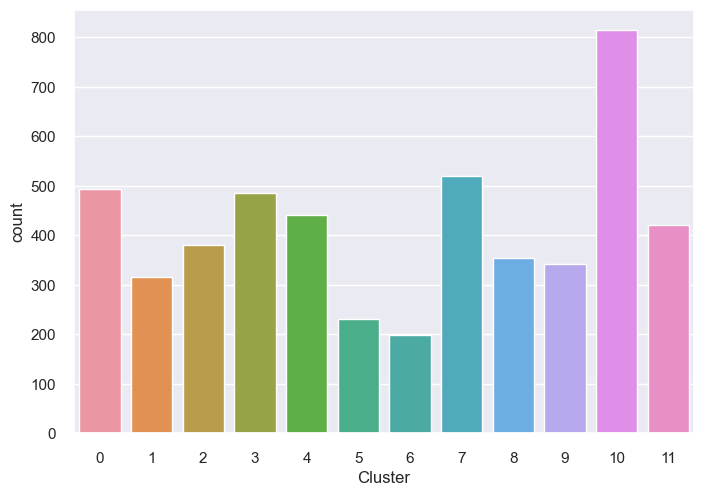

In [106]:
#visualize the clusters

sns.countplot(x='Cluster', data=clus_table)

In [107]:
# which word indexes are in which clusters

clus_table.head()

,Cluster
0,0
1,0
2,0
3,0
4,4


In [108]:
np.shape(sample1)

(5000, 201)

In [109]:
# indexing the words

wordid = sample1.index.values
np.shape(wordid)

(5000,)

In [110]:
wordid = sample1['word']

In [111]:
wordid

0                wa
1             place
2             great
3              stay
4             clean
           ...     
4995    accompanied
4996         elisha
4997         packet
4998          bklyn
4999          circe
Name: word, Length: 5000, dtype: object

In [112]:
#numpy array of words and corresponding labels

clus0 = np.vstack((wordid,km.labels_))
print(np.shape(clus0))

(2, 5000)


In [113]:
clus0

array([['wa', 'place', 'great', ..., 'packet', 'bklyn', 'circe'],
       [0, 0, 0, ..., 5, 11, 10]], dtype=object)

In [114]:
# indices of the words in cluster k and the cluster count

k = 0
clus_index = np.where(clus0[1,:]==k)
print(clus0[0,clus_index])
print(np.count_nonzero(np.where(clus0[1,:]==k)))

[['wa' 'place' 'great' 'stay' 'host' 'would' 'recommend' 'definitely'
  'everything' 'amazing' 'home' 'really' 'super' '’' 'easy' 'u' 'back'
  'highly' 'staying' 'wonderful' 'check' 'needed' 'quick' 'helpful'
  'responsive' 'enjoyed' 'communication' 'best' 'experience' 'made'
  'thank' 'friendly' 'book' 'house' 'make' 'come' 'safe' 'always'
  'excellent' 'accommodating' 'kind' 'question' 'sure' 'go' 'awesome'
  'extremely' 'thanks' 'anyone' 'absolutely' 'exactly' 'every' 'response'
  'hospitality' 'fantastic' 'quickly' 'available' 'checkin' 'welcoming'
  'ever' 'recommended' 'respond' 'anything' 'person' 'booking'
  'thoughtful' 'fast' 'help' 'future' 'went' 'responded' 'second'
  'communicative' 'gave' 'described' 'attentive' 'truly' 'appreciated'
  'privacy' 'pleasant' 'throughout' 'star' 'soon' 'hospitable' 'sweet'
  'incredibly' 'return' 'message' 'beyond' 'hope' 'happy' 'forward'
  'process' 'everyone' 'care' 'helped' 'making' 'communicate' 'tip'
  'clear' 'wait' 'affordable' 'exp

In [115]:
len(km.labels_)

5000

In [117]:
#cluster membership

word_clus = np.vstack((words[0:5000],km.labels_))
print(np.shape(word_clus))

(2, 5000)


In [118]:
print(word_clus[:,0:5])

[['wa' 'place' 'great' 'stay' 'clean']
 ['0' '0' '0' '0' '4']]


In [119]:
#put words and the cluster membership into dataframe

word_clusdf = pd.DataFrame(word_clus.T, columns=('word', 'cluster'))

In [120]:
word_clusdf.shape

(5000, 2)

In [121]:
word_clusdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   word     5000 non-null   object
 1   cluster  5000 non-null   object
dtypes: object(2)
memory usage: 78.2+ KB


In [122]:
# cluster values to int

word_clusdf['cluster'] = word_clusdf['cluster'].astype(int)

In [123]:
word_clusdf.head()

,word,cluster
0,wa,0
1,place,0
2,great,0
3,stay,0
4,clean,4


In [124]:
#pirint words in cluster k
k=7
word_clusdf.loc[word_clusdf['cluster']==k]

,word,cluster
18,good,7
29,like,7
37,get,7
39,one,7
51,could,7
...,...,...
4882,abnb,7
4897,significantly,7
4919,quit,7
4944,competitive,7


In [126]:
#write cluster 3 into a csv

k=3
cluster3 = word_clusdf.loc[word_clusdf['cluster']==k]

cluster3.to_csv('./data/cluster2.csv')

In [127]:
#cluster matrix

from sklearn import metrics
from sklearn.metrics import pairwise_distances, silhouette_score

In [128]:
# Variance Ratio Criterion

metrics.calinski_harabasz_score(X3, km.labels_)

134.42546490321922

In [129]:
print(type(X3))
print(X3.shape)
print(X3.head())

<class 'pandas.core.frame.DataFrame'>
(5000, 200)
         D1        D2        D3        D4        D5        D6        D7  \
0 -0.099291 -0.040848 -0.015637  0.057208 -0.001514 -0.071566 -0.044023   
1  0.002938 -0.004335  0.032460  0.157902 -0.098335  0.010571 -0.023689   
2 -0.042899 -0.022707 -0.089035  0.051864 -0.021149 -0.052607 -0.047069   
3 -0.068315 -0.066404  0.015534  0.083441 -0.115787  0.029018 -0.046011   
4 -0.013725 -0.107591  0.052842  0.042566  0.030888  0.044408 -0.057508   

         D8        D9       D10  ...      D191      D192      D193      D194  \
0 -0.075870  0.041711  0.039101  ...  0.077447 -0.057960  0.019656  0.058180   
1 -0.010015  0.069536 -0.038069  ...  0.076693 -0.037141  0.133684  0.127721   
2 -0.110483  0.093619  0.002971  ...  0.064483 -0.051476  0.040171 -0.003741   
3 -0.059756 -0.045989 -0.067320  ...  0.114720 -0.097564  0.020924  0.073499   
4 -0.105062  0.060723 -0.015389  ...  0.144233  0.017667  0.004078  0.058487   

       D195      D

In [130]:
#silhouette_score

metrics.silhouette_score(X3, km.fit_predict(X3))

0.05643722

not as good a cluster solution?